In [1]:
from pylab import *
from scipy.integrate import *

Masas: 

$M_{Sol} = 1.989 \times 10^{30}$ kg

$M_{Tierra} = 5.972 \times 10^{24}$ kg

$M_{Júpiter} = 1.898 \times 10^{27}$ kg

Distancias:

$D_{Sol-Tierra} = 1$ UA

$D_{Sol-Júpiter} = 5.2$ UA

In [3]:
MT_sol = 5.972/1989000
MJ_sol = 1.898/1989
print('Razon de masas Tierra - Sol:',MT_sol)
print('Razon de masas Jupiter - Sol:',MJ_sol)

Razon de masas Tierra - Sol: 3.002513826043238e-06
Razon de masas Jupiter - Sol: 0.0009542483660130718


In [4]:
def dos_Sol_planteas(t,x,m1M=0,m2M=0):
    # miM = m1M , m2M
    # x = x1,y1,x2,y2,vx1,vy1,vx2,vy2
    #      0 1  2  3   4   5   6   7
    dx1 , dy1 = x[4] , x[5]
    dx2 , dy2 = x[6] , x[7]
    d1M = (x[0]**2 + x[1]**2)**1.5
    d2M = (x[2]**2 + x[3]**2)**1.5
    d12 = ((x[0]-x[2])**2 + (x[1]-x[3])**2)**1.5
    dvx1 = -x[0]/d1M + m2M*(x[2]-x[0])/d12
    dvy1 = -x[1]/d1M + m2M*(x[3]-x[1])/d12
    dvx2 = -x[2]/d2M - m1M*(x[2]-x[0])/d12
    dvy2 = -x[3]/d2M - m1M*(x[3]-x[1])/d12
    return array([dx1,dy1,dx2,dy2,dvx1,dvy1,dvx2,dvy2])

In [5]:
ci = [1,0,5.2,0,0,1,0,5.2/11.86]
solucion = solve_ivp(dos_Sol_planteas,(0,10*2*pi*11.86),ci,
                    rtol=1e-8, atol=1e-8, args=(MT_sol,MJ_sol) )

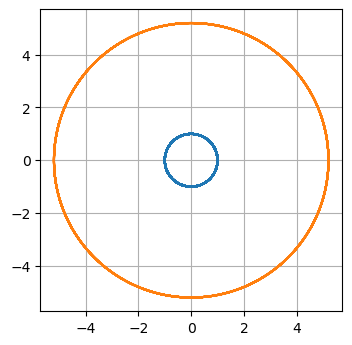

In [6]:
figure(dpi=100)
plot(solucion.y[0],solucion.y[1],label='Tierra')
plot(solucion.y[2],solucion.y[3],label='Júpiter')
gca().set_aspect('equal')
grid()
show()

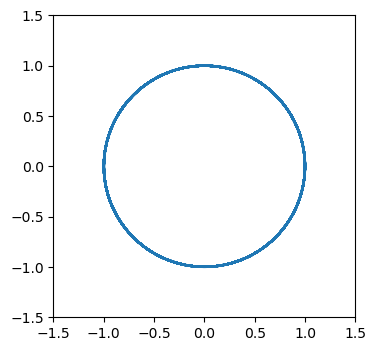

In [7]:
figure(dpi=100)
plot(solucion.y[0],solucion.y[1],label='Tierra')
plot(solucion.y[2],solucion.y[3],label='Júpiter')
xlim([-1.5,1.5]),ylim([-1.5,1.5])
gca().set_aspect('equal')
show()

In [37]:
ci = [1,0,5.2,0,0,1,0,5.2/11.86]
t_final = 10*2*pi*11.86
solucion = solve_ivp(dos_Sol_planteas,(0,t_final),ci,
                    rtol=1e-8, atol=1e-8, args=(MT_sol,10*MJ_sol),
                    dense_output=True)

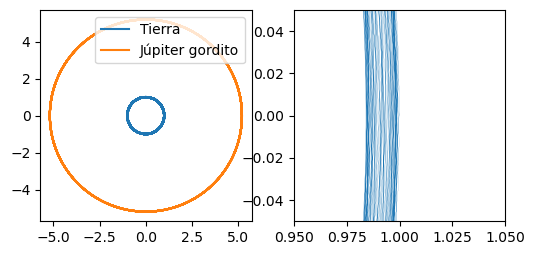

In [38]:
figura,ejes = subplots(1,2,dpi=100)
ejes[0].plot(solucion.y[0],solucion.y[1],label='Tierra')
ejes[0].plot(solucion.y[2],solucion.y[3],label='Júpiter gordito')
ejes[0].set_aspect('equal')
ejes[0].legend()
#
ejes[1].plot(solucion.y[0],solucion.y[1],lw=0.1,label='Tierra')
ejes[1].plot(solucion.y[2],solucion.y[3],label='Júpiter gordito')
ejes[1].set_xlim([0.95,1.05])
ejes[1].set_ylim([-0.05,0.05])
ejes[1].set_aspect('equal')
show()


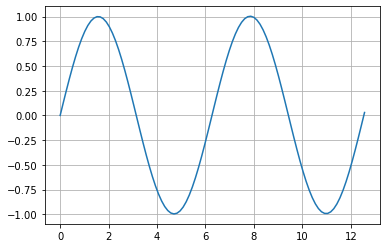

In [39]:
t = linspace(0,4*pi,100)
tray_corta = solucion.sol(t)
plot(t,tray_corta[1])
grid()

In [40]:
tray_corta.shape

(8, 100)

In [43]:
def raices_Newton_num(f,t0,delta=0.001,ind_pos=1,ind_d_pos=5,error=1e-5):
    # nota mental: 
    # Estoy haciendo el mapeo en y y vy de la Tierra
    while abs(f(t0)[ind_pos]) > error:
        t0 = t0 - f(t0)[ind_pos]/f(t0)[ind_d_pos]
    return t0

def t0_raices(t_f,inicio=3):
    tiempos = []
    while inicio <= t_f:
        tiempos.append(raices_Newton_num(solucion.sol,inicio))
        inicio = tiempos[-1] + 3
    #for i in range(N):
    #    tiempos.append(raices_Newton_num(solucion.sol,inicio))
    #    inicio = tiempos[i] + 3
    return tiempos

In [45]:
tiempos_mapeo = t0_raices(t_final)
len(tiempos_mapeo)

237